Digital Image and Video Processing

Dr. Nguyen Ngoc Truong Minh

Student ID : 22MSE23094 - Ha Quyet Thang

Ex1. Convert the objects’ color as follows: the square to red, the
rectangle to green, the pentagon to blue, the circle to magenta and the star to cyan.


<Figure size 1200x600 with 0 Axes>

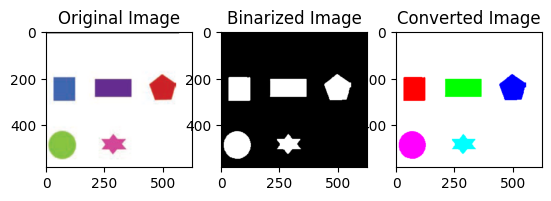

<Figure size 640x480 with 0 Axes>

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from skimage import measure, color
import urllib.request

url = 'https://raw.githubusercontent.com/thang22mse23094/ImageVideoProcessing/main/shapes.png'
resp = urllib.request.urlopen(url)
arr = np.asarray(bytearray(resp.read()), dtype=np.uint8)
Img = cv2.imdecode(arr, cv2.IMREAD_COLOR)

# Img = cv.imread('shapes.png')
# Convert the image from BGR to RGB
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)

GrayImg = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
GrayImg[0:20,:] = 255 # make black bar on top becomes white

level, bwImg = cv2.threshold(GrayImg, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

[L, obj] = measure.label(bwImg, connectivity=2, return_num=True)


# cmap = np.array([[255, 0, 255], [255, 0, 0], [0, 255, 0], [0, 255, 255], [0, 0, 255]]) / 255
cmap = np.array([[0, 0, 255], [255, 0, 0], [0, 255, 0], [255, 0, 255], [0, 255, 255]]) / 255
# cmap = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255]]) / 255
rgblabel = color.label2rgb(L, colors=cmap, bg_label=0, bg_color='white')

minobjsize = 2000
bg = L > 0
regs = measure.regionprops_table(bg.astype(int), properties=['area'])

# eliminate small objects less than 2,000 pixels
regs = {k: v for k, v in regs.items() if v.size >= minobjsize}

# Display the images
plt.figure(figsize=(12, 6))
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(Img)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(bwImg, cmap='gray')
plt.title('Binarized Image')

plt.subplot(1, 3, 3)
plt.imshow(rgblabel)
plt.title('Converted Image')
plt.show()

plt.tight_layout()
plt.show()

Ex2. (a) Convert the original image to binary and display the result.

(b) Use erosion and/or dilation to draw the edge of the objects. You can
choose any structuring element to apply.

(c) Generate a structuring element as below. Could we count the number
of coins using this structuring element?


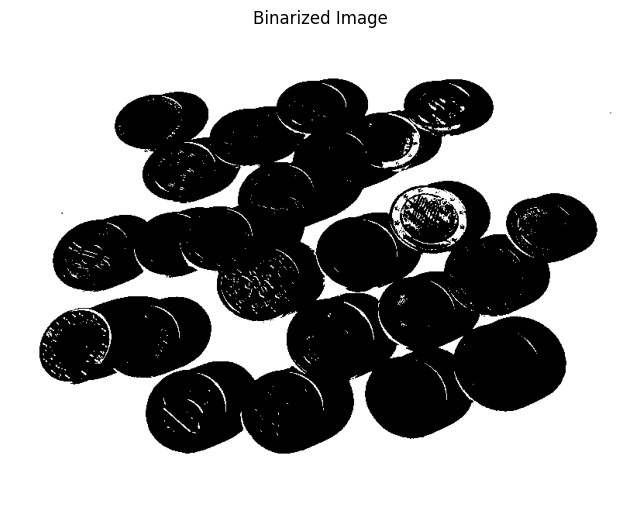

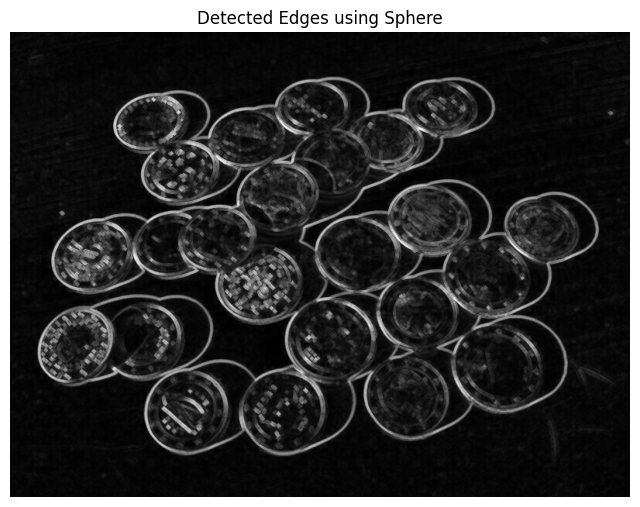

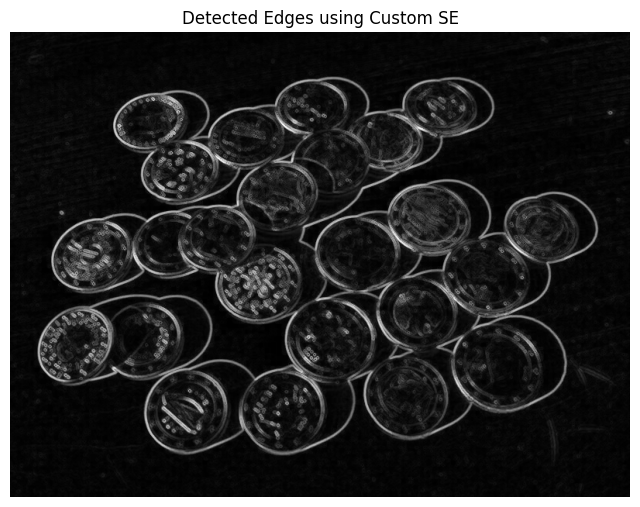

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import disk, dilation, erosion
from skimage.measure import label, regionprops

# Load the image
img = imread('https://raw.githubusercontent.com/thang22mse23094/ImageVideoProcessing/main/coins.png')

# Binarize the image
threshold = threshold_otsu(img)
bw_img = img > threshold

# Display the binarized image
plt.figure(figsize=(8, 8))
plt.imshow(bw_img, cmap='gray')
plt.title('Binarized Image')
plt.axis('off')
plt.show()

# Dilate and erode the image using a disk-shaped structuring element
se_disk = disk(2)
img_dilated = dilation(img, se_disk)
img_eroded = erosion(img, se_disk)

# Detect edges using the dilated and eroded images
edges = img_dilated - img + img - img_eroded

# Display the detected edges using a sphere-shaped structuring element
plt.figure(figsize=(8, 8))
plt.imshow(edges, cmap='gray')
plt.title('Detected Edges using Sphere')
plt.axis('off')
plt.show()

# Create your own structuring element
se_custom = np.array([[0, 1, 1, 0],
                      [1, 0, 0, 1],
                      [1, 0, 0, 1],
                      [0, 1, 1, 0]], dtype=np.uint8)

# Dilate and erode the image using the custom structuring element
img_dilated_custom = dilation(img, se_custom)
img_eroded_custom = erosion(img, se_custom)

# Detect edges using the dilated and eroded images with the custom structuring element
edges_custom = img_dilated_custom - img + img - img_eroded_custom

# Display the detected edges using the custom structuring element
plt.figure(figsize=(8, 8))
plt.imshow(edges_custom, cmap='gray')
plt.title('Detected Edges using Custom SE')
plt.axis('off')
plt.show()